In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
numeric = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical = [x for x in df.columns if x not in numeric]
to_encode = ['cp', 'slp', 'caa', 'thall', 'restecg', 'cp']

In [4]:
df = pd.get_dummies(df,columns=to_encode)

In [5]:
norms = df[numeric].copy()

In [6]:
scaler = StandardScaler()

In [7]:
norms = scaler.fit_transform(norms)

In [9]:
df.loc[:, numeric] = norms

In [10]:
for i in df.columns[9:]:
    df[i] = df[i].astype('float64')

In [11]:
df

age  sex    trtbps      chol  fbs  thalachh  exng   oldpeak  output  \
0    0.952197    1  0.763956 -0.256334    1  0.015443     0  1.087338       1   
1   -1.915313    1 -0.092738  0.072199    0  1.633471     0  2.122573       1   
2   -1.474158    0 -0.092738 -0.816773    0  0.977514     0  0.310912       1   
3    0.180175    1 -0.663867 -0.198357    0  1.239897     0 -0.206705       1   
4    0.290464    0 -0.663867  2.082050    0  0.583939     1 -0.379244       1   
..        ...  ...       ...       ...  ...       ...   ...       ...     ...   
298  0.290464    0  0.478391 -0.101730    0 -1.165281     1 -0.724323       0   
299 -1.033002    1 -1.234996  0.342756    0 -0.771706     0  0.138373       0   
300  1.503641    1  0.706843 -1.029353    1 -0.378132     0  2.036303       0   
301  0.290464    1 -0.092738 -2.227533    0 -1.515125     1  0.138373       0   
302  0.290464    0 -0.092738 -0.198357    0  1.064975     0 -0.896862       0   

     cp_0  ...  thall_1  thall_2  thall_3  restecg_0  restecg_1  restecg_2  \
0     0.0  ...      1.0      0.0      0.0        1.0        0.0        0.0   
1     0.0  ...      0.0      1.0      0.0        0.0        1.0        0.0   
2     0.0  ...      0.0      1.0      0.0        1.0        0.0        0.0   
3     0.0  ...      0.0      1.0      0.0        0.0        1.0        0.0   
4     1.0  ...      0.0      1.0      0.0        0.0        1.0        0.0   
..    ...  ...      ...      ...      ...        ...        ...        ...   
298   1.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
299   0.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
300   1.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
301   1.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
302   0.0  ...      0.0      1.0      0.0        1.0        0.0        0.0   

     cp_0  cp_1  cp_2  cp_3  
0     0.0   0.0   0.0   1.0  
1     0.0   0.0   1.0   0.0  
2     0.0   1.0   0.0   0.0  
3     0.0   1.0   0.0   0.0  
4     1.0   0.0   0.0   0.0  
..    ...   ...   ...   ...  
298   1.0   0.0   0.0   0.0  
299   0.0   0.0   0.0   1.0  
300   1.0   0.0   0.0   0.0  
301   1.0   0.0   0.0   0.0  
302   0.0   1.0   0.0   0.0  

[303 rows x 32 columns]

In [12]:
x = df.drop('output', axis=1)
y = df['output']

In [13]:
x

age  sex    trtbps      chol  fbs  thalachh  exng   oldpeak  cp_0  \
0    0.952197    1  0.763956 -0.256334    1  0.015443     0  1.087338   0.0   
1   -1.915313    1 -0.092738  0.072199    0  1.633471     0  2.122573   0.0   
2   -1.474158    0 -0.092738 -0.816773    0  0.977514     0  0.310912   0.0   
3    0.180175    1 -0.663867 -0.198357    0  1.239897     0 -0.206705   0.0   
4    0.290464    0 -0.663867  2.082050    0  0.583939     1 -0.379244   1.0   
..        ...  ...       ...       ...  ...       ...   ...       ...   ...   
298  0.290464    0  0.478391 -0.101730    0 -1.165281     1 -0.724323   1.0   
299 -1.033002    1 -1.234996  0.342756    0 -0.771706     0  0.138373   0.0   
300  1.503641    1  0.706843 -1.029353    1 -0.378132     0  2.036303   1.0   
301  0.290464    1 -0.092738 -2.227533    0 -1.515125     1  0.138373   1.0   
302  0.290464    0 -0.092738 -0.198357    0  1.064975     0 -0.896862   0.0   

     cp_1  ...  thall_1  thall_2  thall_3  restecg_0  restecg_1  restecg_2  \
0     0.0  ...      1.0      0.0      0.0        1.0        0.0        0.0   
1     0.0  ...      0.0      1.0      0.0        0.0        1.0        0.0   
2     1.0  ...      0.0      1.0      0.0        1.0        0.0        0.0   
3     1.0  ...      0.0      1.0      0.0        0.0        1.0        0.0   
4     0.0  ...      0.0      1.0      0.0        0.0        1.0        0.0   
..    ...  ...      ...      ...      ...        ...        ...        ...   
298   0.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
299   0.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
300   0.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
301   0.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
302   1.0  ...      0.0      1.0      0.0        1.0        0.0        0.0   

     cp_0  cp_1  cp_2  cp_3  
0     0.0   0.0   0.0   1.0  
1     0.0   0.0   1.0   0.0  
2     0.0   1.0   0.0   0.0  
3     0.0   1.0   0.0   0.0  
4     1.0   0.0   0.0   0.0  
..    ...   ...   ...   ...  
298   1.0   0.0   0.0   0.0  
299   0.0   0.0   0.0   1.0  
300   1.0   0.0   0.0   0.0  
301   1.0   0.0   0.0   0.0  
302   0.0   1.0   0.0   0.0  

[303 rows x 31 columns]

In [14]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=30)

In [15]:
train_x

age  sex    trtbps      chol  fbs  thalachh  exng   oldpeak  cp_0  \
251  0.291667    1  0.358491  0.276256    1  0.549618     1  0.016129   1.0   
199  0.750000    1  0.150943  0.278539    0  0.664122     0  0.096774   1.0   
250  0.458333    1  0.433962  0.392694    0  0.389313     1  0.677419   1.0   
299  0.333333    1  0.150943  0.315068    0  0.465649     0  0.193548   0.0   
42   0.333333    1  0.094340  0.187215    0  0.587786     1  0.483871   1.0   
..        ...  ...       ...       ...  ...       ...   ...       ...   ...   
192  0.520833    1  0.245283  0.141553    0  0.320611     0  0.225806   1.0   
36   0.520833    0  0.386792  0.406393    1  0.755725     0  0.000000   0.0   
277  0.583333    1  0.283019  0.308219    0  0.534351     0  0.048387   0.0   
159  0.562500    1  0.339623  0.216895    0  0.702290     0  0.000000   0.0   
218  0.750000    1  0.386792  0.292237    0  0.427481     0  0.451613   1.0   

     cp_1  ...  thall_1  thall_2  thall_3  restecg_0  restecg_1  restecg_2  \
251   0.0  ...      0.0      0.0      1.0        1.0        0.0        0.0   
199   0.0  ...      1.0      0.0      0.0        1.0        0.0        0.0   
250   0.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
299   0.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
42    0.0  ...      0.0      1.0      0.0        1.0        0.0        0.0   
..    ...  ...      ...      ...      ...        ...        ...        ...   
192   0.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
36    0.0  ...      0.0      1.0      0.0        0.0        1.0        0.0   
277   1.0  ...      0.0      0.0      1.0        0.0        1.0        0.0   
159   1.0  ...      0.0      0.0      1.0        1.0        0.0        0.0   
218   0.0  ...      0.0      0.0      1.0        1.0        0.0        0.0   

     cp_0  cp_1  cp_2  cp_3  
251   1.0   0.0   0.0   0.0  
199   1.0   0.0   0.0   0.0  
250   1.0   0.0   0.0   0.0  
299   0.0   0.0   0.0   1.0  
42    1.0   0.0   0.0   0.0  
..    ...   ...   ...   ...  
192   1.0   0.0   0.0   0.0  
36    0.0   0.0   1.0   0.0  
277   0.0   1.0   0.0   0.0  
159   0.0   1.0   0.0   0.0  
218   1.0   0.0   0.0   0.0  

[212 rows x 31 columns]

In [15]:
from sklearn.metrics import accuracy_score

In [114]:
class LogisticNN_2:
    def __init__(self, x, y, echo=True):
        self.X = x.T
        self.Y = np.array(y).reshape(1, y.shape[0])
        self.n_x = self.X.shape[0]
        self.m = self.X.shape[1]
        self.n_h = 2
        self.n_y = self.Y.shape[0]
        self._convergence = 0.000001
        self._echo = echo
        self._trained = False
        
    def _sigmoid(self, z):
        s = 1/(1+np.exp(-z))
        return s
    
    def fit(self, epochs=100, test_set=None, learn_rate=0.0001, history=False):
        if not self._trained:
            self.history = {'train': [],
                    'test': [],
                    'loss': []}
        if not self._trained:
            w1 = np.random.randn(self.n_h,self.n_x)*0.01
            b1 = np.zeros((self.n_h, 1))
            w2 = np.random.randn(self.n_y, self.n_h)*0.01
            b2 = np.zeros((self.n_y, 1))
            self._params = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}
        
        
        
        for i in range(epochs):
            A2, cache = self._forward_propagate(self.X, self._params)
            
            epsilon = 1e-10
            log_probs = -(self.Y*np.log(np.clip(A2, epsilon, 1-epsilon)) + (1-self.Y)*np.log(np.clip(1-A2, epsilon, 1-epsilon)))
            cost = (1/self.m)*np.sum(log_probs)
            self.history['loss'].append(cost)
            grads = self._backward_propagate(cache)
            
            
            self._params['w1'] -= learn_rate*grads['dw1']
            self._params['b1'] -= learn_rate*grads['db1']
            self._params['w2'] -= learn_rate*grads['dw2']
            self._params['b2'] -= learn_rate*grads['db2']
            
            
            if self._echo:
                pred = self.predict(self.X, test=False)
                acc = accuracy_score(pred, self.Y.T)
                if test_set:
                    test_pred = self.predict(test_set[0])
                    acc_valid = accuracy_score(test_pred, test_set[1])
                    print(f"EPOCH {i+1}: LOSS [{round(cost,3)}] --- Accuracy Train [{round(acc,3)}] --- Validation [{acc_valid}]")
                    self.history['train'].append(acc)
                    self.history['test'].append(acc_valid)
                else:
                    print(f"EPOCH {i+1}: LOSS [{round(cost,3)}] --- Accuracy [{round(acc,3)}]")
        self._A2 = A2
        self._trained = True

    
    def _relu(self, z):
        return np.maximum(0, z)
        

     
    def _forward_propagate(self, x, params):
        try:
            params['w1']
        except Exception:
            print('NOPE')
            
        #forward propagate
        Z1 = np.dot(params['w1'], x) + params['b1']
        A1 = self._relu(Z1)
        Z2 = np.dot(params['w2'], A1) + params['b2']
        A2 = self._sigmoid(Z2)
    
        cache = {'z1': Z1,
                 'a1': A1,
                 'z2': Z2,
                 'a2': A2}
        
        return A2, cache

    def _backward_propagate(self, cache):
        
        W1 = self._params['w1']
        W2 = self._params['w2']
        
        A1 = cache['a1']
        A2 = cache['a2']
        
        dZ2 = A2 - self.Y
        dW2 = (1/self.m)*np.dot(dZ2, A1.T)
        db2 = (1/self.m)*np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(W2.T, dZ2)*(A1 > 0)
        dW1 = (1/self.m)*np.dot(dZ1, self.X.T)
        db1 = (1/self.m)*np.sum(dZ1, axis=1, keepdims=True)
        
        grads = {'dw1': dW1,
                 'db1': db1,
                 'dw2': dW2,
                 'db2': db2}
        
        return grads
    
    def predict(self, x, threshold=0.5, test=True):
        if test:
            A2, cache = self._forward_propagate(x.T, self._params)
        else:
            A2, cache = self._forward_propagate(x, self._params)
            
        predictions = np.where(A2>=threshold, 1, 0)
        return predictions.ravel()

In [115]:
model = LogisticNN_2(train_x, train_y)

In [116]:
model.fit(test_set=(test_x,test_y), epochs=42_000, learn_rate=0.00075)

EPOCH 1: LOSS [0.693] --- Accuracy Train [0.472] --- Validation [0.4725274725274725]
EPOCH 2: LOSS [0.693] --- Accuracy Train [0.5] --- Validation [0.5164835164835165]
EPOCH 3: LOSS [0.693] --- Accuracy Train [0.538] --- Validation [0.5164835164835165]
EPOCH 4: LOSS [0.693] --- Accuracy Train [0.561] --- Validation [0.6153846153846154]
EPOCH 5: LOSS [0.693] --- Accuracy Train [0.575] --- Validation [0.6153846153846154]
EPOCH 6: LOSS [0.693] --- Accuracy Train [0.575] --- Validation [0.5604395604395604]
EPOCH 7: LOSS [0.693] --- Accuracy Train [0.557] --- Validation [0.5824175824175825]
EPOCH 8: LOSS [0.693] --- Accuracy Train [0.547] --- Validation [0.5604395604395604]
EPOCH 9: LOSS [0.693] --- Accuracy Train [0.542] --- Validation [0.5604395604395604]
EPOCH 10: LOSS [0.693] --- Accuracy Train [0.538] --- Validation [0.5604395604395604]
EPOCH 11: LOSS [0.693] --- Accuracy Train [0.538] --- Validation [0.5604395604395604]
EPOCH 12: LOSS [0.693] --- Accuracy Train [0.538] --- Validation 

In [112]:
import matplotlib.pyplot as plt

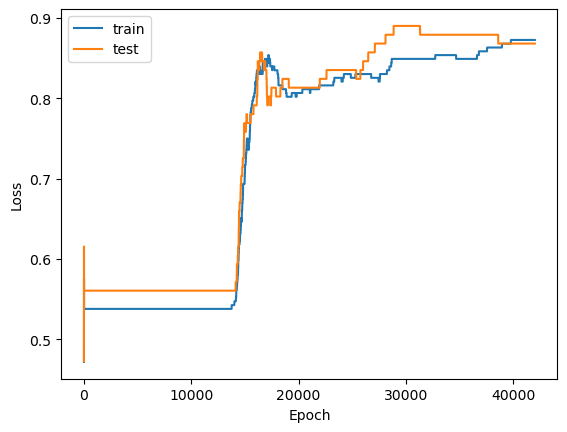

In [117]:
pd.DataFrame(model.history).iloc[:,:2].plot()
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.show()

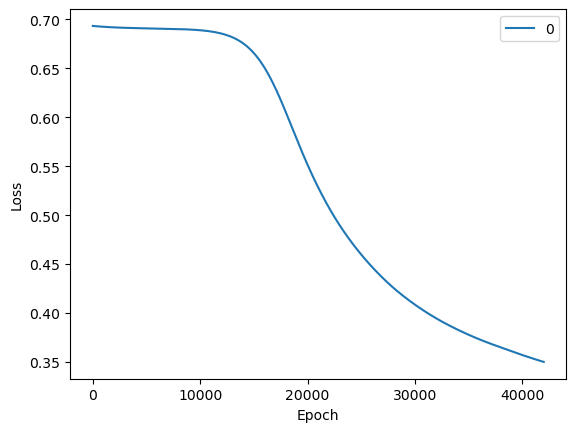

In [118]:
pd.DataFrame(model.history['loss']).plot()
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.show()


In [119]:
pred = model.predict(test_x)

In [120]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.88      0.88      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
model2 = LogisticRegression()

In [123]:
model2.fit(train_x, train_y)

LogisticRegression()

In [124]:
pred2 = model2.predict(test_x)

In [125]:
print(classification_report(pred2, test_y))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.88      0.88      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

